# Bird distributions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
birds = pd.read_csv('../../data/birds.csv')
birds.head()


,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [10]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]  
filteredBirds.head(5)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
65,Inca dove,Scardafella inca,Pigeons/Doves,Columbiformes,Columbidae,Columbina,LC,16.5,23.0,30.0,58.0,28.5,32.0
66,Common ground dove,Columbina passerina,Pigeons/Doves,Columbiformes,Columbidae,Columbina,LC,15.0,18.0,26.0,40.0,27.0,27.0
70,Black-billed cuckoo,Coccyzus erythropthalmus,Cuckoos,Cuculiformes,Cuculidae,Cuculidae,LC,28.0,32.0,45.0,55.0,44.0,44.0
73,Common poorwill,Phalaenoptilus nuttallii,Nightjars/Allies,Caprimulgiformes,Caprimulgidae,Phalaenoptilus,LC,18.0,18.0,36.0,58.0,30.0,30.0
76,Chimney swift,Chaetura pelagica,Swifts,Apodiformes,Apodidae,Chaetura,VU,12.0,15.0,17.0,30.0,27.0,30.0


/tmp/ipykernel_20648/3288808698.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='MaxWingspan', ylabel='Density'>

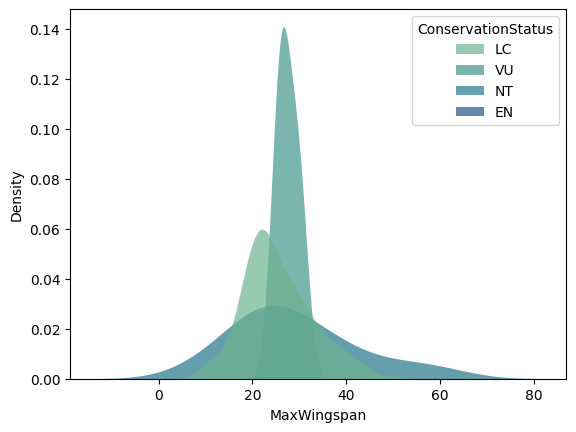

In [13]:
sns.kdeplot(
   data=filteredBirds, x="MaxWingspan", hue="ConservationStatus",
   fill=True, common_norm=False, palette="crest",
   alpha=.7, linewidth=0,
)

/tmp/ipykernel_20648/914134839.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinWingspan", y="MaxWingspan", hue="ConservationStatus")


<Axes: xlabel='MinWingspan', ylabel='MaxWingspan'>

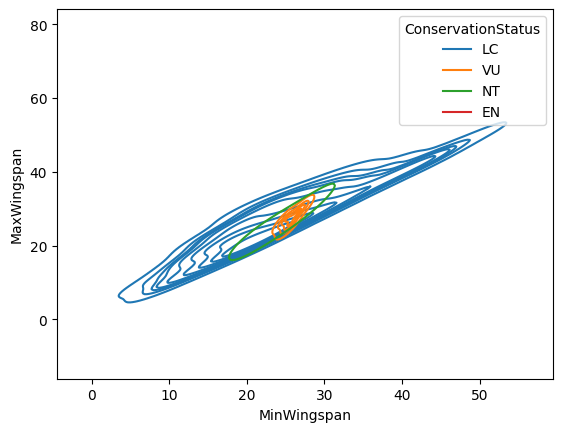

In [14]:
sns.kdeplot(data=filteredBirds, x="MinWingspan", y="MaxWingspan", hue="ConservationStatus")

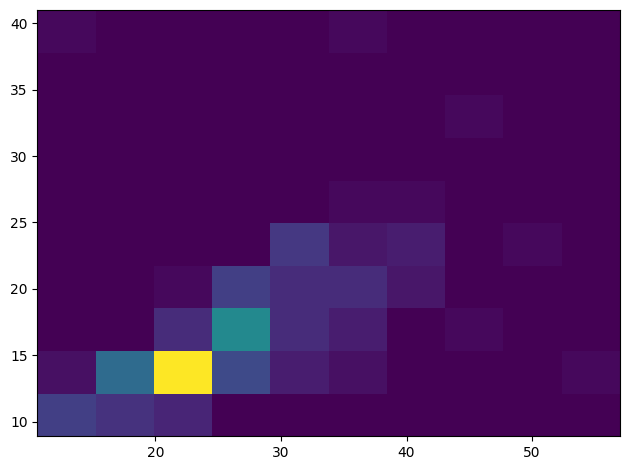

In [15]:
x = filteredBirds['MaxWingspan']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

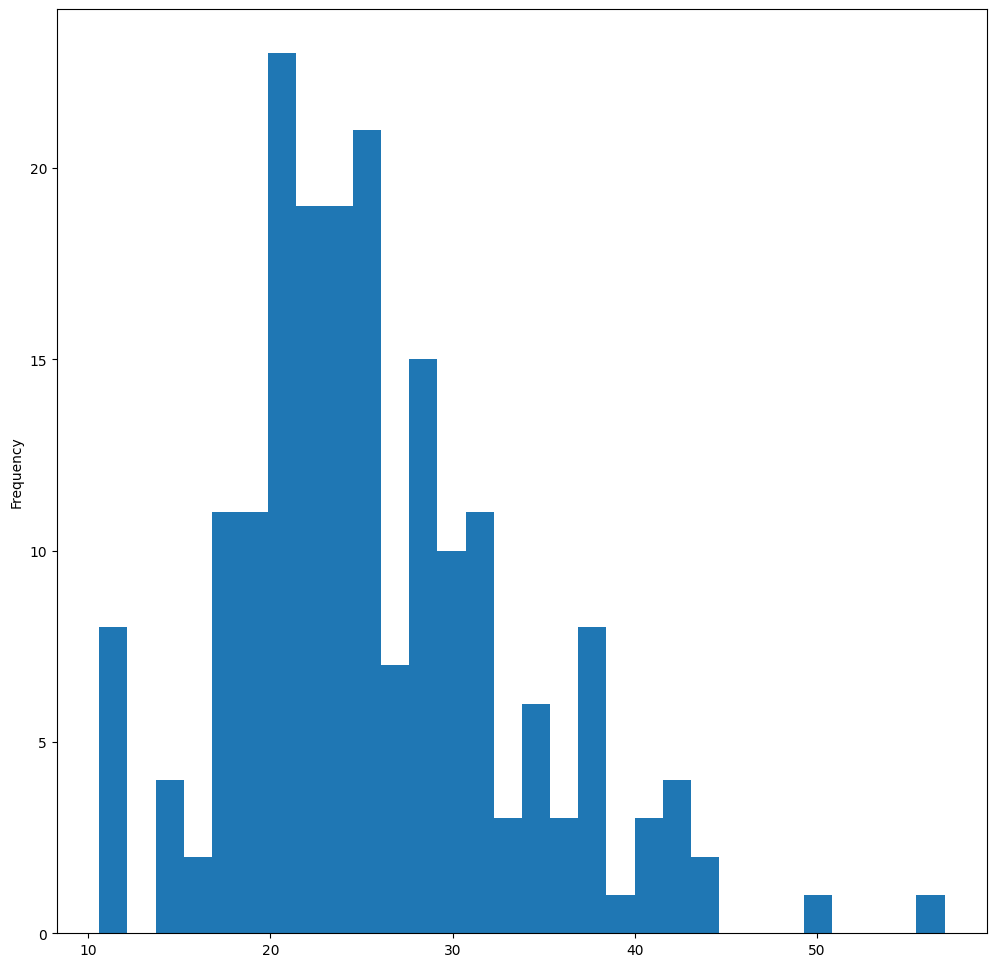

In [18]:
filteredBirds['MaxWingspan'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

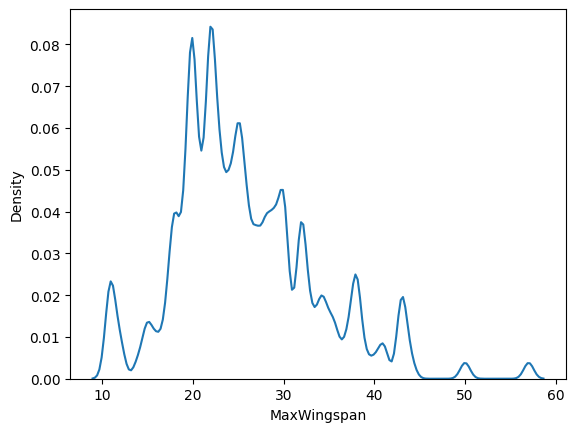

In [19]:
sns.kdeplot(filteredBirds['MaxWingspan'], bw_adjust=.2)
plt.show()

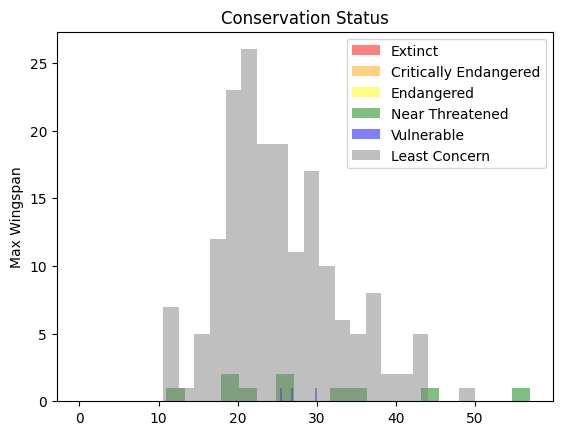

In [20]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MaxWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MaxWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MaxWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MaxWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MaxWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MaxWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Wingspan')
plt.legend();

### Conclusion
From the data:
- most birds are distributed around the mean of the max wingspan of 20-30 cm.
- Pretty much only birds with max wingspan and are endangered are distributed only within this mean area. Birds of least concern are spread everywhere, and birds that are near threatened also have a loose spread as well.